In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [3]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
match1 = df2[((df2['team1'] == 'Delhi Daredevils') | (df2['team1'] == 'Delhi Capitals')) & (df2['team2'] == 'Mumbai Indians')]
match2 = df2[(df2['team1'] == 'Mumbai Indians') & ((df2['team2'] == 'Delhi Daredevils') | (df2['team2'] == 'Delhi Capitals'))]

Match1 = Delhi Home Ground

Match2 = Mumbai Home Ground

# Overall Delhi vs Mumbai:

In [5]:
match = pd.concat((match1,match2))
match.head()

id  season    city        date             team1           team2  \
237  238    2011   Delhi  2011-04-10  Delhi Daredevils  Mumbai Indians   
341  342    2012   Delhi  2012-04-27  Delhi Daredevils  Mumbai Indians   
538  539    2015   Delhi  2015-04-23  Delhi Daredevils  Mumbai Indians   
555  556    2015  Mumbai  2015-05-05  Delhi Daredevils  Mumbai Indians   
592  593    2016   Delhi  2016-04-23  Delhi Daredevils  Mumbai Indians   

          toss_winner toss_decision  result  dl_applied            winner  \
237  Delhi Daredevils           bat  normal           0    Mumbai Indians   
341    Mumbai Indians         field  normal           0  Delhi Daredevils   
538    Mumbai Indians         field  normal           0  Delhi Daredevils   
555  Delhi Daredevils           bat  normal           0    Mumbai Indians   
592    Mumbai Indians         field  normal           0  Delhi Daredevils   

     win_by_runs  win_by_wickets  player_of_match             venue  \
237            0               8       SL Malinga  Feroz Shah Kotla   
341           37               0         V Sehwag  Feroz Shah Kotla   
538           37               0          SS Iyer  Feroz Shah Kotla   
555            0               5  Harbhajan Singh  Wankhede Stadium   
592           10               0        SV Samson  Feroz Shah Kotla   

             umpire1        umpire2 umpire3  
237        AM Saheba      RB Tiffin     NaN  
341        Aleem Dar   BNJ Oxenford     NaN  
538           SD Fry      CK Nandan     NaN  
555  HDPK Dharmasena    CB Gaffaney     NaN  
592           S Ravi  C Shamshuddin     NaN

Matches played between Delhi and Mumbai.

In [6]:
match.shape

(24, 18)

In [7]:
match['winner'].value_counts()

Mumbai Indians      12
Delhi Daredevils    11
Delhi Capitals       1
Name: winner, dtype: int64

In [8]:
match['winner'].value_counts().plot.bar()
plt.show()

**Mumbai and Delhi both won 12 times against each other.**

In [9]:
match['toss_winner'].value_counts()

Delhi Daredevils    14
Mumbai Indians      10
Name: toss_winner, dtype: int64

In [10]:
match['toss_decision'].value_counts()

field    15
bat       9
Name: toss_decision, dtype: int64

In [11]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Delhi Daredevils    5
Mumbai Indians      3
Name: winner, dtype: int64

In [12]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

**Mumbai won the toss and won the match 5 times whereas Delhi won 3 times. So winning toss doesn't have much affect to winning the match. And Delhi Capitals didn't win a toss and win a match for a single time agaisnt Mumbai. That means in recent times Delhi didn't win a toss and win a match for a single time against Mumbai.**

In [13]:
ids = list(match['id'])
delivery = df1[df1['match_id'].isin(ids)]
delivery.head()

match_id  inning    batting_team      bowling_team  over  ball  \
5512        24       1  Mumbai Indians  Delhi Daredevils     1     1   
5513        24       1  Mumbai Indians  Delhi Daredevils     1     2   
5514        24       1  Mumbai Indians  Delhi Daredevils     1     3   
5515        24       1  Mumbai Indians  Delhi Daredevils     1     4   
5516        24       1  Mumbai Indians  Delhi Daredevils     1     5   

         batsman non_striker    bowler  is_super_over  ...  bye_runs  \
5512    PA Patel  JC Buttler  K Rabada              0  ...         0   
5513  JC Buttler    PA Patel  K Rabada              0  ...         0   
5514  JC Buttler    PA Patel  K Rabada              0  ...         0   
5515    PA Patel  JC Buttler  K Rabada              0  ...         0   
5516  JC Buttler    PA Patel  K Rabada              0  ...         0   

      legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
5512            1            0             0             0           1   
5513            0            0             0             0           5   
5514            0            0             0             1           0   
5515            0            0             0             1           0   
5516            0            0             0             0           0   

      total_runs  player_dismissed dismissal_kind fielder  
5512           1               NaN            NaN     NaN  
5513           5               NaN            NaN     NaN  
5514           1               NaN            NaN     NaN  
5515           1               NaN            NaN     NaN  
5516           0               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Mumbai and Delhi.

In [14]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## How many wickets will Kagiso Rabada take in the match:

In [15]:
wicket_list = []
total_ids = list(delivery[delivery['bowler'] == 'K Rabada']['match_id'].unique())
for i in total_ids:
    wickets = delivery[(delivery['match_id'] == i) & (delivery['bowler'] == 'K Rabada')]['player_dismissed'].count()
    wicket_list.append(wickets)
wicket_list

[2, 1, 2, 2]

Kagiso Rabada played 4 matches against Mumbai and took these many wickets.

In [16]:
avg_wickets = np.mean(wicket_list)
avg_wickets

1.75

Kagiso Rabada took ~2 wickets in an average against Mumbai.

In [17]:
wicket_list_overall = []
total_ids = list(df1[df1['bowler'] == 'K Rabada']['match_id'].unique())
for i in total_ids:
    wickets = df1[(df1['match_id'] == i) & (df1['bowler'] == 'K Rabada')]['player_dismissed'].count()
    wicket_list_overall.append(wickets)
print(wicket_list_overall)

[2, 2, 0, 0, 3, 1, 2, 1, 2, 3, 1, 4, 2, 4, 2, 2, 3, 2]


These are the wickets taken by Kagiso Rabada in overall IPL till now.

In [18]:
avg_wickets_overall= np.mean(wicket_list_overall)
avg_wickets_overall

2.0

Kagiso Rabada took 2 wickets in an average in overall IPL.

In [19]:
average_wickets = pd.Series([avg_wickets,avg_wickets_overall],index = ['Against Mumbai','Overall'])
sns.barplot(x = average_wickets.index, y = average_wickets)
plt.title('Wickets taken by Kagiso Rabada in an average per match')
plt.show()

**Kagiso Rabada took more/less 2 wickets against Mumbai or in overall IPL till now. This year also he has taken most wickets and the current holder of purple cap.**

## How many runs will be scored by Hardik Pandya in the match:

In [20]:
runs_list = []
total_ids = list(delivery[delivery['batsman'] == 'HH Pandya']['match_id'].unique())
for i in total_ids:
    batsman_runs = delivery[(delivery['match_id'] == i) & (delivery['batsman'] == 'HH Pandya')]['batsman_runs'].sum()
    runs_list.append(batsman_runs)
runs_list

[24, 29, 0, 5, 2, 2, 29, 0, 32]

These are the runs scored by Hardik Pandya against Delhi.

In [21]:
avg_runs = np.mean(runs_list)
avg_runs

13.666666666666666

Hardik Pandya scored ~14 runs in an average per macth against Delhi till now.

In [22]:
runs_list_overall = []
total_ids = list(df1[df1['batsman'] == 'HH Pandya']['match_id'].unique())
for i in total_ids:
    batsman_runs = df1[(df1['match_id'] == i) & (df1['batsman'] == 'HH Pandya')]['batsman_runs'].sum()
    runs_list_overall.append(batsman_runs)
print(runs_list_overall)

[35, 29, 2, 9, 6, 15, 24, 13, 4, 14, 29, 15, 30, 1, 14, 10, 16, 0, 5, 21, 8, 61, 1, 0, 9, 9, 2, 2, 2, 2, 4, 7, 7, 23, 2, 17, 4, 4, 13, 59, 23, 37, 20, 38, 10, 29, 0, 34, 33, 26, 14, 25, 30, 40, 32, 25, 24, 96, 25, 13, 16]


These are the runs scored by Hardik Pandya in overall IPL till now.

In [23]:
avg_runs_overall = np.mean(runs_list_overall)
avg_runs_overall

18.327868852459016

Hardik Pandya scored ~18 runs in an average per macth in overall IPL till now.

In [24]:
average_runs = pd.Series([avg_runs,avg_runs_overall],index = ['Against Delhi','Overall'])
sns.barplot(x = average_runs.index, y = average_runs)
plt.title('Average runs scored by Hardik Pandya per match')
plt.show()

**So Hardik Pandya's average score in overall IPL is higher than against Delhi. His most of the scores are below 10 or above 20. So if he crosses 10 runs, most of the time he converts those to 20+ runs**

## How many no balls will be bowled in the match:

In [25]:
total_no_balls = delivery['noball_runs'].sum()
total_no_balls

28

Total 28 no balls were bowled in Mumbai vs Delhi match till now.

In [26]:
noballs_by_Mumbai = delivery[delivery['bowling_team'] == 'Mumbai Indians']['noball_runs'].sum()
noballs_by_Mumbai

13

Mumbai bowled only 13 no-balls against Delhi till now.

In [27]:
noballs_by_Delhi = delivery[delivery['bowling_team'] != 'Mumbai Indians']['noball_runs'].sum()
noballs_by_Delhi

15

Delhi bowled only 15 no-balls against Mumbai till now.

In [28]:
avg_noballs = (total_no_balls/len(ids))
avg_noballs

1.1666666666666667

There is 1 no-ball in an average per match.

In [29]:
noballs_bowling_first = delivery[delivery['inning'] == 1]['noball_runs'].sum()
noballs_bowling_first

19

Team bowled 19 no-balls while bowling first.

In [30]:
avg_noballs_bowling_first = (noballs_bowling_first/len(ids))
avg_noballs_bowling_first

0.7916666666666666

There is less than 1 no ball in an average per match by team bowling first.

In [31]:
noballs_bowling_second = delivery[delivery['inning'] == 2]['noball_runs'].sum()
noballs_bowling_second

9

Team bowled 9 no-balls while bowling second.

In [32]:
avg_noballs_bowling_second = (noballs_bowling_second/len(ids))
avg_noballs_bowling_second

0.375

There is very less chances of no ball in an average per match by team bowling second.

In [33]:
total_noballs_per_match = pd.Series([total_no_balls,noballs_bowling_first,noballs_bowling_second],index=['Total','Bowling First','Bowling Second'])
sns.barplot(x = total_noballs_per_match.index , y = total_noballs_per_match)
plt.title('Total No Balls')
plt.show()

**There is very less chances of no ball in the match between Mumbai and Delhi.**

In [34]:
noballs_by_Mumbai_overall = df1[df1['bowling_team'] == 'Mumbai Indians']['noball_runs'].sum()
noballs_by_Mumbai_overall

112

Mumbai bowled 112 no-balls in overall IPL till now.

In [35]:
total_matches_Mumbai = list(df1[df1['bowling_team'] == 'Mumbai Indians']['match_id'].unique())
avg_noballs_by_Mumbai = noballs_by_Mumbai_overall/len(total_matches_Mumbai)
avg_noballs_by_Mumbai

0.5989304812834224

There is less than 1 no-ball in an average per match by Mumbai in IPL.

In [36]:
noballs_by_Delhi_overall = df1[(df1['bowling_team'] == 'Delhi Daredevils') | (df1['bowling_team'] == 'Delhi Capitals')]['noball_runs'].sum()
noballs_by_Delhi_overall

99

Delhi bowled 99 no-balls in overall IPL till now.

In [37]:
total_matches_Delhi = list(df1[(df1['bowling_team'] == 'Delhi Daredevils') | (df1['bowling_team'] == 'Delhi Capitals')]['match_id'].unique())
avg_noballs_by_Delhi = noballs_by_Delhi_overall/len(total_matches_Delhi)
avg_noballs_by_Delhi

0.5625

There is less than 1 no-ball in an average per match by Delhi in IPL.

## How many runs will be scored in total,by both teams, in the match:

In [38]:
total_run = delivery['total_runs'].sum()
total_run

7559

Total 7559 runs made in Mumbai vs Delhi match till now.

In [39]:
total_run_Mumbai = delivery[delivery['batting_team'] == 'Mumbai Indians']['total_runs'].sum()
total_run_Mumbai

3980

Mumbai scored total 3980 runs against Delhi till now.

In [40]:
total_run_Delhi = delivery[delivery['batting_team'] != 'Mumbai Indians']['total_runs'].sum()
total_run_Delhi

3579

Delhi scored total 3579 runs against Mumbai till now.

In [41]:
avg_run_per_match = math.ceil(total_run/len(ids))
avg_run_per_match

315

315 runs in an average made in a match between Mumbai and Delhi.

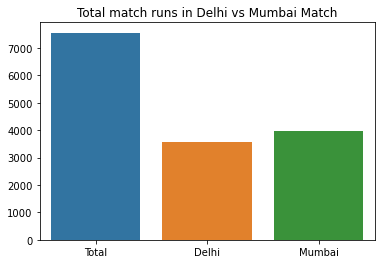

In [42]:
total_match_runs = pd.Series([total_run,total_run_Delhi,total_run_Mumbai],index = ['Total','Delhi','Mumbai'])
sns.barplot(x=total_match_runs.index,y=total_match_runs)
plt.title('Total match runs in Delhi vs Mumbai Match')
plt.show()

**Mumbai scored more runs against Delhi.**

In [43]:
total_run_Mumbai_batting_first = delivery[(delivery['batting_team'] == 'Mumbai Indians') & (delivery['inning'] == 1)]['total_runs'].sum()
total_run_Mumbai_batting_first

2896

Mumbai scored total 2896 runs against Delhi while batting first.

In [44]:
total_matches_batting_first_Mumbai = len(delivery[(delivery['batting_team'] == 'Mumbai Indians') & (delivery['inning'] == 1)]['match_id'].unique())
total_matches_batting_first_Mumbai

17

Total 17 matches played by Mumbai while batting first.

In [45]:
avg_run_Mumbai_batting_first = math.ceil(total_run_Mumbai_batting_first/total_matches_batting_first_Mumbai)
avg_run_Mumbai_batting_first

171

Mumbai scored 171 in as average against Delhi while batting first.

In [46]:
total_run_Mumbai_batting_second = delivery[(delivery['batting_team'] == 'Mumbai Indians') & (delivery['inning'] == 2)]['total_runs'].sum()
total_run_Mumbai_batting_second

1084

Mumbai scored total 1084 runs against Delhi while batting second.

In [47]:
total_matches_batting_second_Mumbai = len(delivery[(delivery['batting_team'] == 'Mumbai Indians') & (delivery['inning'] == 2)]['match_id'].unique())
total_matches_batting_second_Mumbai

7

Total 7 matches played by Mumbai while batting second.

In [48]:
avg_run_Mumbai_batting_second = math.ceil(total_run_Mumbai_batting_second/total_matches_batting_second_Mumbai)
avg_run_Mumbai_batting_second

155

Mumbai scored 155 in as average against Delhi while batting second.

In [49]:
average_match_runs_Mumbai = pd.Series([avg_run_Mumbai_batting_first,avg_run_Mumbai_batting_second],index = ['Batting First','Batting Second'])
sns.barplot(x=average_match_runs_Mumbai.index,y=average_match_runs_Mumbai)
plt.title('Average match runs of Mumbai against Delhi')
plt.show()

**Mumbai scored more runs against Delhi while batting first.**

In [50]:
total_run_Delhi_batting_first = delivery[(delivery['batting_team'] != 'Mumbai Indians') & (delivery['inning'] == 1)]['total_runs'].sum()
total_run_Delhi_batting_first

1213

Delhi scored total 1213 runs against Mumbai while batting first.

In [51]:
total_matches_batting_first_Delhi = len(delivery[(delivery['batting_team'] != 'Mumbai Indians') & (delivery['inning'] == 1)]['match_id'].unique())
total_matches_batting_first_Delhi

7

Total 7 matches played by Delhi while batting first.

In [52]:
avg_run_Delhi_batting_first = math.ceil(total_run_Delhi_batting_first/total_matches_batting_first_Delhi)
avg_run_Delhi_batting_first

174

Delhi scored 174 runs in an average against Mumbai while batting first.

In [53]:
total_run_Delhi_batting_second = delivery[(delivery['batting_team'] != 'Mumbai Indians') & (delivery['inning'] == 2)]['total_runs'].sum()
total_run_Delhi_batting_second

2366

Delhi scored total 2366 runs against Mumbai while batting second.

In [54]:
total_matches_batting_second_Delhi = len(delivery[(delivery['batting_team'] != 'Mumbai Indians') & (delivery['inning'] == 2)]['match_id'].unique())
total_matches_batting_second_Delhi

17

Total 17 matches played by Delhi while batting second.

In [55]:
avg_run_Delhi_batting_second = math.ceil(total_run_Delhi_batting_second/total_matches_batting_second_Delhi)
avg_run_Delhi_batting_second

140

Delhi scored 140 runs in an average against Mumbai while batting second.

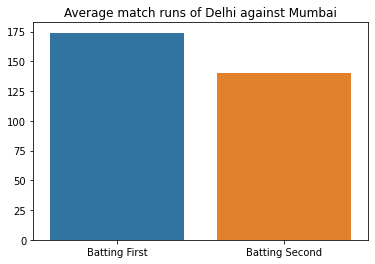

In [56]:
average_match_runs_Delhi = pd.Series([avg_run_Delhi_batting_first,avg_run_Delhi_batting_second],index = ['Batting First','Batting Second'])
sns.barplot(x=average_match_runs_Delhi.index,y=average_match_runs_Delhi)
plt.title('Average match runs of Delhi against Mumbai')
plt.show()

**Delhi scored more runs against Mumbai while batting first.**

In [57]:
total_runs_Mumbai_batting_first_Delhi_batting_second = avg_run_Mumbai_batting_first+avg_run_Delhi_batting_second
total_runs_Mumbai_batting_first_Delhi_batting_second

311

311 total runs scored in an average in Mumbai vs Delhi match when Mumbai batted in first inning.

In [58]:
total_runs_Delhi_batting_first_Mumbai_batting_second = avg_run_Delhi_batting_first+avg_run_Mumbai_batting_second
total_runs_Delhi_batting_first_Mumbai_batting_second

329

329 total runs scored in an average in Mumbai vs Delhi match when Delhi batted in first inning.

In [59]:
average_match_runs = pd.Series([avg_run_per_match,total_runs_Mumbai_batting_first_Delhi_batting_second,total_runs_Delhi_batting_first_Mumbai_batting_second],index = ['Total','Mumbai Batting First','Delhi Batting First'])
sns.barplot(x=average_match_runs.index,y=average_match_runs)
plt.title('Total match runs in Mumbai vs Delhi Match')
plt.show()

**So when Delhi bat first the total score is higher than when Mumbai bat first.**